In [ ]:
# tasks
# check bumpers from mexico
# 3 Try getting data straight from googl  sheets

In [1]:
import os,sys
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)  # To find local version of the library

In [2]:
import pandas as pd
import numpy as np
import glob
from collections import Counter
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sb
import datetime
import itertools

from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix as cm

% matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# add auto relaod
%load_ext autoreload
% autoreload 2
from utils import *
from detect_peaks import detect_peaks
    
from sklearn_porter import Porter


In [3]:
cd ..

/home/gidi/nbs/RoadTrackACC


## GDrive try

In [25]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
 
 
# use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds']
creds = ServiceAccountCredentials.from_json_keyfile_name('/home/gidi/nbs/RoadTrackACC/data/client_secret.json', scope)
client = gspread.authorize(creds)
 
# Find a workbook by name and open the first sheet
# Make sure you use the right name here.
sheet = client.open("Roadtrack_tags").sheet1
 
# Extract and print all of the values
list_of_hashes = sheet.get_all_records()
print(list_of_hashes)

APIError: {
 "error": {
  "errors": [
   {
    "domain": "global",
    "reason": "insufficientPermissions",
    "message": "Insufficient Permission"
   }
  ],
  "code": 403,
  "message": "Insufficient Permission"
 }
}


In [24]:
client.list_permissions('Roadtrack_tags')

APIError: {
 "error": {
  "errors": [
   {
    "domain": "global",
    "reason": "insufficientPermissions",
    "message": "Insufficient Permission"
   }
  ],
  "code": 403,
  "message": "Insufficient Permission"
 }
}


In [22]:
client.list_spreadsheet_files()

APIError: {
 "error": {
  "errors": [
   {
    "domain": "global",
    "reason": "insufficientPermissions",
    "message": "Insufficient Permission"
   }
  ],
  "code": 403,
  "message": "Insufficient Permission"
 }
}


## Vizualize

In [4]:
f = glob.glob('data/*.xlsx')

In [5]:
f

['data/Acc_Data_0805.xlsx',
 'data/Acc_Data_Tow_1605.xlsx',
 'data/standStillUphill.xlsx',
 'data/Acc_Data_0205.xlsx',
 'data/Acc_Data_Toyota_2604.xlsx',
 'data/Acc_Data_180518_Mexico.xlsx',
 'data/standStillDownHill.xlsx',
 'data/Acc_Test_240418.xlsx',
 'data/Acc_Data_040618.xlsx',
 'data/Acc_Data_Tow_1005.xlsx',
 'data/BUMPERS.xlsx',
 'data/Acc_Data_0305.xlsx',
 'data/standStillFlat.xlsx']

In [7]:
excel = pd.ExcelFile('data/Acc_Data_040618.xlsx')

In [65]:
excel = pd.ExcelFile('data/Acc_Data_0205.xlsx')

In [57]:
excel.sheet_names[:2]

['BUMPERS1', 'Bumpers2']

In [55]:
excel.sheet_names[:2]

['ZigZag1', 'ZigZag2']

In [40]:
    features = ['Vertical', 'Forward', 'Radial', 'Speed', 'Ignition', 'level_0']
    numeric_features = ['Vertical', 'Forward', 'Speed', 'Radial']

In [30]:
key_df=pd.read_csv('/home/gidi/nbs/RoadTrackACC/data/RoadTrack_Experiment_log - Acc_Data.csv')

In [31]:
    def get_category_from_file(file_name, sheet_name):

        if '/' in file_name:
            file_name = file_name.split('/')[-1]
        print(file_name, sheet_name)

        category_name = key_df[(key_df.file_name == file_name) & (key_df.sheet_name == sheet_name)].event_type.values[0]
        category_dict = {'Driving': 0, 'Hard stop': 5, 'Zigzag': 2, 'Bumper': 4, 'Dirty Road': 3, 'Tow': 6, 'Standstill': 1}


In [72]:
#'data/Acc_Data_040618.xlsx'
df = excel.parse('ZigZag1', header=1)
df = df.reset_index()
df.columns = [column.replace(' ', '') for column in df.columns]
df[numeric_features] = df[numeric_features].apply(pd.to_numeric, errors='coerce')
 
#df_list.append(df)

In [60]:
df.head()

,level_0,level_1,Vertical,Forward,Radial,Speed,Ignition
0,11:24:26.418,32,-240,0,0,0,1
1,11:24:26.418,32,-240,0,0,0,1
2,11:24:26.418,32,-240,0,0,0,1
3,11:24:26.419,43,-240,-12,-12,0,1
4,11:24:26.419,17,-240,0,-12,0,1


In [52]:
df.set_index(pd.to_datetime(df['level_0'].str.replace(']', '')))

,level_0,level_1,Radial,Forward,Vertical,Speed,Ignition
level_0,,,,,,,
NaT,15:11:20.696000,78,36,-12,-252.0,66.0,1.0
NaT,15:11:20.696000,62,24,0,-252.0,66.0,1.0
NaT,15:11:20.696000,105,36,0,-216.0,66.0,1.0
NaT,15:11:20.696000,45,24,0,-228.0,66.0,1.0
NaT,15:11:20.696000,60,36,0,-240.0,66.0,1.0
NaT,15:11:20.696000,43,24,-12,-228.0,66.0,1.0
NaT,15:11:20.696000,28,24,0,-240.0,66.0,1.0
NaT,15:11:20.696000,28,24,-12,-240.0,66.0,1.0
NaT,15:11:20.696000,85,36,-12,-252.0,66.0,1.0


In [68]:
b=df['level_0']

In [36]:
df = df[features]
df.Vertical = df.Vertical + 240
df = df.set_index(pd.to_datetime(df['level_0'].str.replace(']', '')))  # add more columns

In [8]:

df['file'] = 'Acc_Data_040618.xlsx'.split('/')[-1]
df['sheet'] = 'ZigZag1'

df['cat_id'] = get_category_from_file('Acc_Data_040618.xlsx', 'ZigZag1')

big_df = big_df.append(df)  # put it all in

NameError: name 'df' is not defined

Loading file:data/Acc_Data_040618.xlsx
Acc_Data_040618.xlsx ZigZag1
Acc_Data_040618.xlsx ZigZag2
Acc_Data_040618.xlsx ZigZag3
Acc_Data_040618.xlsx LowBumper1
Acc_Data_040618.xlsx LowBumper2
Acc_Data_040618.xlsx LowBumper3
Acc_Data_040618.xlsx HighBumber1
error in sheet above. Check experiment log
Acc_Data_040618.xlsx HighBumper2
Acc_Data_040618.xlsx HighBumper3


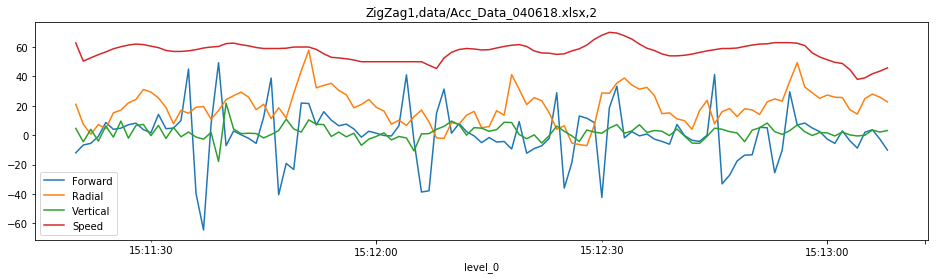

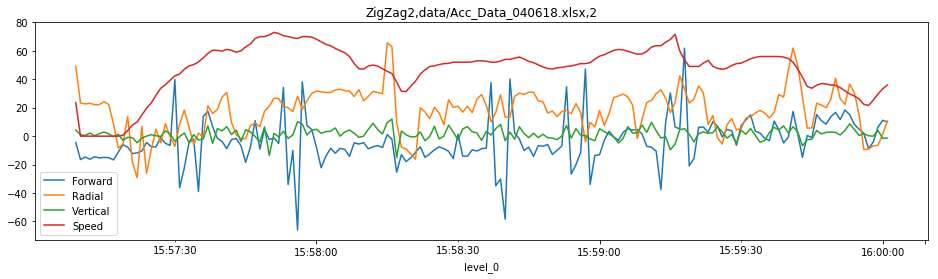

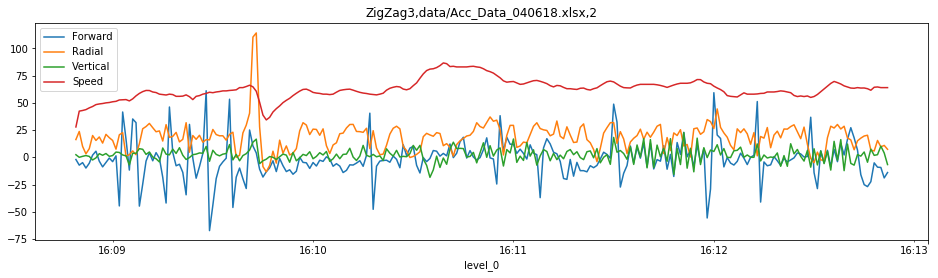

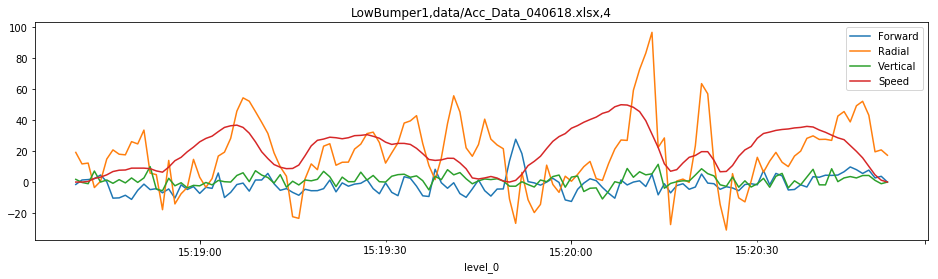

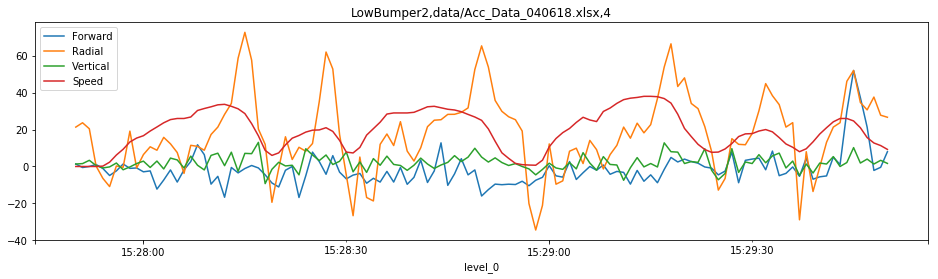

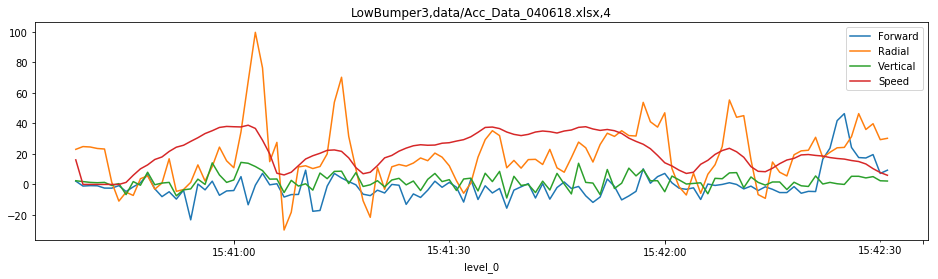

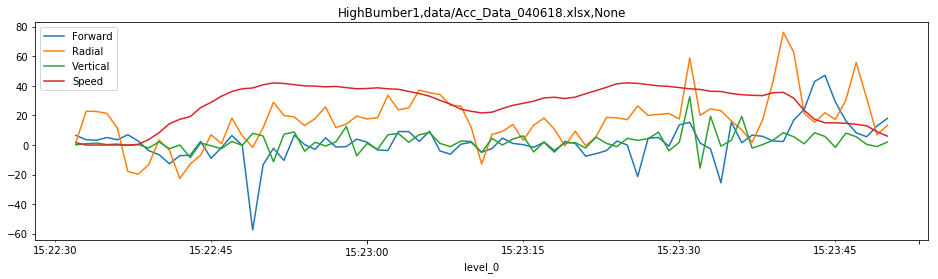

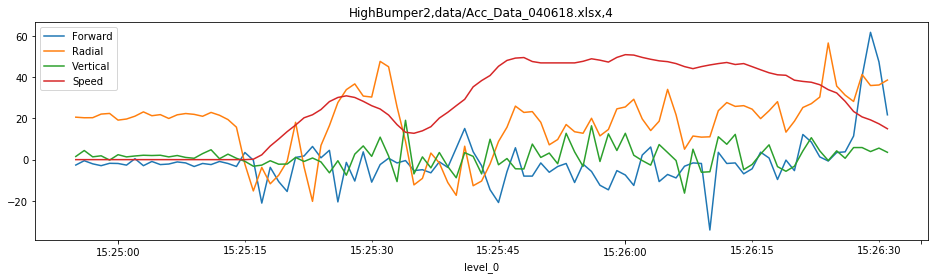

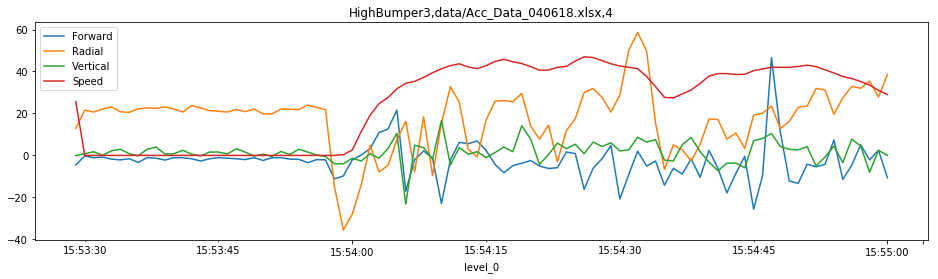

In [11]:

loader = DataLoader()
loader.load_data([ 'data/Acc_Data_040618.xlsx'],plot=True) # Mexica first file
big_df=loader.big_df

In [14]:
# read from annotation file
anot_file = 'data/Roadtrack_tags - Acc_Data_240418.csv'

anot = pd.read_csv(anot_file)
    


In [15]:
event_type='bumper'
events = anot[anot.event==event_type]
# fit date time format. first workout hard stops
events['start time']=pd.to_datetime(events['start time'])
events['end time']=pd.to_datetime(events['end time'])
anot.keys()

Index(['file', 'sheet', 'event', 'start time', 'end time', 'start row',
       'end row'],
      dtype='object')

In [18]:
bumpers_list=[]
first_second_stop = []
for row in events.iterrows():
    i=0
    time = row[1]['start time']
    first_second_stop.append(time)
    #while time >= row[1]['start time'] and time<=row[1]['start time']+datetime.timedelta(0,1):
    for i in range(1,3):
        bumpers_list.append(time)
        time=row[1]['start time']+datetime.timedelta(0,i) 
        i+=1
len(bumpers_list)

180

In [72]:
big_df.time_sec

level_0
2018-06-05 15:11:20.696   2018-06-05 15:11:21
2018-06-05 15:11:20.696   2018-06-05 15:11:21
2018-06-05 15:11:20.696   2018-06-05 15:11:21
2018-06-05 15:11:20.696   2018-06-05 15:11:21
2018-06-05 15:11:20.696   2018-06-05 15:11:21
2018-06-05 15:11:20.696   2018-06-05 15:11:21
2018-06-05 15:11:20.696   2018-06-05 15:11:21
2018-06-05 15:11:20.696   2018-06-05 15:11:21
2018-06-05 15:11:20.696   2018-06-05 15:11:21
2018-06-05 15:11:20.712   2018-06-05 15:11:21
2018-06-05 15:11:20.712   2018-06-05 15:11:21
2018-06-05 15:11:20.712   2018-06-05 15:11:21
2018-06-05 15:11:20.712   2018-06-05 15:11:21
2018-06-05 15:11:20.712   2018-06-05 15:11:21
2018-06-05 15:11:20.712   2018-06-05 15:11:21
2018-06-05 15:11:20.712   2018-06-05 15:11:21
2018-06-05 15:11:20.712   2018-06-05 15:11:21
2018-06-05 15:11:20.712   2018-06-05 15:11:21
2018-06-05 15:11:20.712   2018-06-05 15:11:21
2018-06-05 15:11:20.712   2018-06-05 15:11:21
2018-06-05 15:11:20.712   2018-06-05 15:11:21
2018-06-05 15:11:20.712   

In [52]:
# set event annotations in bigdf

big_df[event_type]=0
big_df[event_type][(big_df.cat_id==4)&(big_df.time_sec.dt.time.isin(pd.DataFrame(bumpers_list)[0].dt.time))]=1
sum(big_df[event_type])

1851

## Plot events

6638


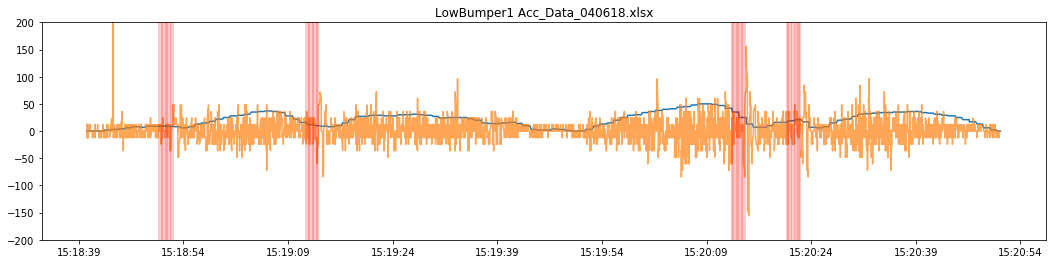

6085


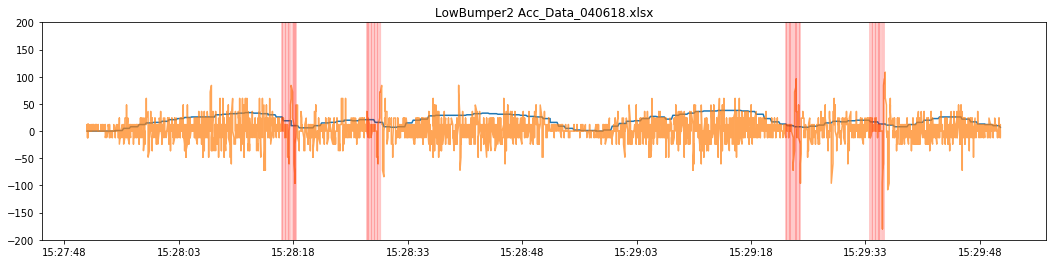

5749


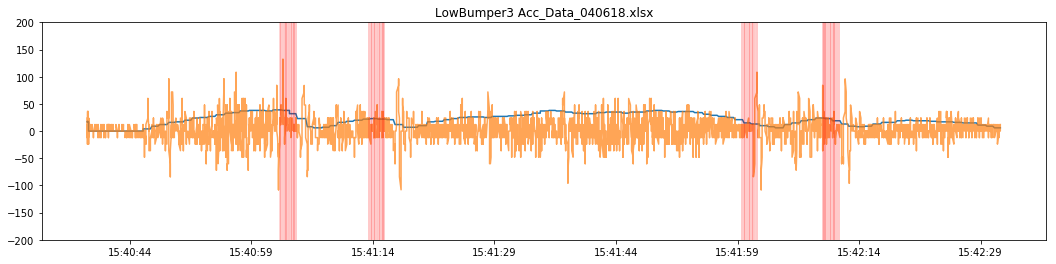

4947


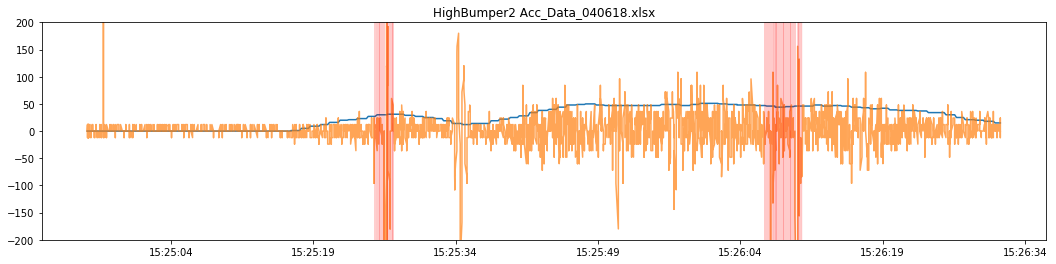

4648


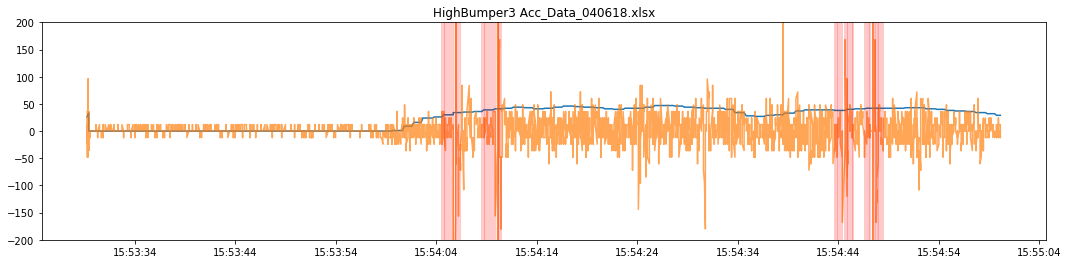

In [70]:
# event. plot

event_cats=[4]
for r in big_df[big_df['cat_id'].isin(event_cats)][['sheet','file']].drop_duplicates().iterrows():
    sheet=r[1]['sheet']
    file=r[1]['file']

    fig,ax = plt.subplots(figsize=(18,4))
    df = big_df[(big_df['cat_id'].isin(event_cats))&(big_df.sheet==sheet)&(big_df.file==file)]
    ax.set_ylim(-200,200)
    print(len(df))
    ax.plot(df.index, df['Speed'])
    ax.plot(df.index, df['Vertical'],alpha=0.7)
    #ax.plot(df.index, df['Forward'])
    ax.set_title(sheet+' '+df['file'].iloc[0])
    for i,bump in enumerate(df[event_type][df[event_type]==1].iteritems()):
        ax.axvline(x=bump[0], color='r',alpha=0.03)

    #f = thresholding_algo(df.Vertical,400,10,0.7)
    #fig,ax = plt.subplots(figsize=(18,4))
    #ax.plot(f['signals'])
    plt.show()